In [1]:
from sklearn.datasets import make_regression

bias = 100
X, y, coef = make_regression(n_features=1, bias=bias, coef=True, noise=10, random_state=42)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

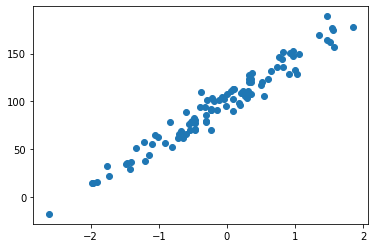

In [20]:
plt.scatter(X, y)

In [21]:
X.shape

(100, 1)

In [10]:
# coef is slop
# bias is y intercept

In [22]:
X[:10]

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424],
       [ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ]])

In [23]:
y[:10]

array([150.77992943,  89.93472984,  65.08160809, 110.52674299,
        82.26162276, 131.56459551,  69.93111725, 105.91200699,
       123.47337416, 132.34359474])

In [24]:
m = 0

In [25]:
c = 0

In [27]:
yp = m * X + c

ya = y.reshape(-1, 1)

In [37]:
yp.shape

(100, 1)

In [40]:
del_m = (2 * (yp - ya) * X).mean()

In [41]:
del_m

-52.51501101699809

In [42]:
del_c = (2 * (yp - ya)).mean()

In [44]:
del_c

-193.10093994796395

In [45]:
m = m - del_m
c = c - del_c

In [116]:
yp = m*X + c
lr = .1
del_m = (2 * (yp - ya) * X).mean() * lr
del_c = (2 * (yp - ya)).mean() * lr
m = m - del_m
c = c - del_c
print(del_m, del_c)

-0.0124479730532601 0.026554409926062308


In [113]:
print(m, c)

44.362078326579336 101.32532714491735


In [114]:
coef, bias

(array(41.74110031), 100)

In [144]:
class CustomLinearReg:
    
    def __init__(self, max_iters=100, lr=.1):
        self.max_iters = max_iters
        self.lr = lr
        self.coef_ = 0
        self.intercept_ = 0
        
    def fit(self, X, y):
        self.__X = X
        self.__ya = y.reshape(-1, 1)
        
        errors = []
        
        for step in range(self.max_iters):
            
            yp = self.coef_ * X + self.intercept_
            del_m = (2 * (yp - self.__ya) * self.__X).mean() * self.lr
            del_c = (2 * (yp - self.__ya)).mean() * self.lr
            self.coef_-= del_m
            self.intercept_ -= del_c
            errors.append(self.calculate_error())
        
        return errors
    
    def calculate_error(self):
        yp = self.coef_ * self.__X + self.intercept_
        return ((yp - ya) ** 2).mean()
             

In [157]:
model = CustomLinearReg(lr=.1, max_iters=30)

In [158]:
errors = model.fit(X, y)

In [159]:
model.coef_

43.99428798010289

In [160]:
model.intercept_

100.88853486910325

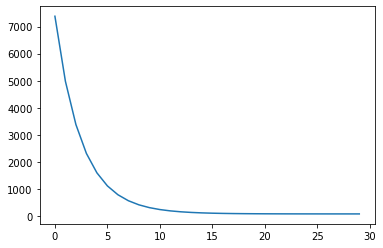

In [161]:
plt.plot(np.arange(len(errors)), errors)

In [150]:
from sklearn.linear_model import LinearRegression

In [152]:
model = LinearRegression()

In [153]:
model.fit(X, y)

LinearRegression()

In [155]:
model.coef_

array([44.43716999])

In [156]:
model.intercept_

101.16511532052698